# CelMo example.

In [1]:
from celmo import *
from celmo.interface.notebook import * 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

# Data and project directory 

The function `read_enzo_data` returns a cel_data container. The arguments of the function are:

1. `project_path` : A directory containing ENZO uni-grid data for CE simulations (Passy J. C. et al. 2012, ApJ, 744, 52). 
2. `data_path` : A path for CelMo data.
3. `yt_reader` : Activate/deactivate the use of yt to read the data. `yt_reader=False` uses a build-in procedure to read the data files.

In [2]:
data_directory=os.path.expanduser("~/data/enzo/data/DD0000/data0000")
project_directory=os.path.expanduser("~/data/celmo")

celmo_data = read_enzo_data(project_path=project_directory,data_path=data_directory,yt_reader=False)

CELMO WARNING [2016-11-18 09:57:14,049] | No field Total_Energy found, trying TotalEnergy.
CELMO INFO [2016-11-18 09:57:14,194] | Found TotalEnergy field.


## Temperature
`compute_temperature` requieres:
1. Teff     : Effective temperature of the initial model 
2. mu       : The mean molecular weight, $T=\frac{U M(\gamma-1)}{N_a k}$ where $M=1.00797/\mu$
3. rho0     : A floor density 
4. cel_data : CelMo data container with fields `energy density` $U$ and `density` $rho$

**Note: `density` is required to define the "vacuum region" $\rho < \rho_0$ **

In [3]:
compute_temperature( Teff=3500, mu=1.2, rho0=1e-9, cel_data=celmo_data)

CELMO INFO [2016-11-18 09:57:19,163] | Found temperature.


In [ ]:

compute_opacity(celmo_data)

compute_filters(celmo_data)

compute_attenuation(celmo_data)

compute_optical_depth(celmo_data)

compute_brightness(celmo_data)

compute_extinction_factor(celmo_data)

compute_energy_flux_density(celmo_data)

compute_luminosity(celmo_data,project_directory)

`list_fields` and `list_parameters` shows the data contained in `celmo_data`

In [16]:
celmo_fields=celmo_data.list_fields()
#for the next example we don't need these fields 
celmo_fields.remove('x')
celmo_fields.remove('y')
celmo_fields.remove('z')
celmo_fields.remove('dx')
celmo_fields.remove('dy')
celmo_fields.remove('dz')
celmo_fields.remove('particle_position_x')
celmo_fields.remove('particle_position_y')
celmo_fields.remove('particle_position_z')

## Plot 1d cuts of the fields

`get_field_1d` returs a 1d numpy array with the data at half domain 

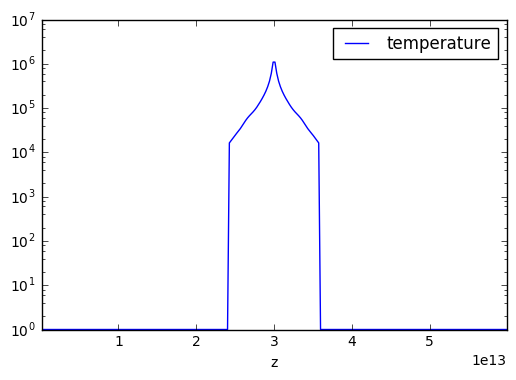

In [18]:
def show_field(field=celmo_fields,axis=['x','y','z'],plot=False,logscale=False):
    axis_map={'x':0,'y':1,'z':2}
    temperature = celmo_data.get_field_1d(field,axis=axis_map[axis])
    coordinate=celmo_data.get_field_1d(axis,axis=axis_map[axis])
    df = pd.DataFrame({axis:coordinate,field:temperature})
    if plot:
        df.set_index(axis).plot(logy=logscale)
    else:
        print(df) 
d=interact_manual(show_field)

In [ ]:
efd=celmo_data.get_field('EFD_B_mX')

In [ ]:
plt.imshow(np.log(efd+1))

In [ ]:
plt.show()